In [1]:
# Import dependencies
import os
import requests
import pandas as pd
import alpaca_trade_api as tradeapi

%matplotlib inline

In [2]:
# Load .env variables
from dotenv import load_dotenv
load_dotenv()

True

- Alpaca api data:

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [4]:
# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes (5 years)
start_date = pd.Timestamp("2017-11-17", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-11-01", tz="America/New_York").isoformat()

# ticker information
tickers = ["TSLA","SPY","XEL","AAPL","ESGU"]


In [5]:
# Get 5 year's worth of historical price data
df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# set date as index
df_ticker.index = df_ticker.index.date

# sample data
df_ticker.head()

,open,high,low,close,volume,trade_count,vwap,symbol
2017-11-17,171.04,171.39,169.6400,170.15,21900015,130140,170.393943,AAPL
2017-11-20,170.29,170.56,169.5600,169.98,16262789,95572,170.000606,AAPL
2017-11-21,170.78,173.70,170.7800,173.14,25131295,137407,172.945834,AAPL
2017-11-22,173.36,175.00,173.0500,174.96,25589080,130437,174.322524,AAPL
2017-11-24,175.10,175.50,174.6459,174.97,14446088,64847,175.096149,AAPL


In [6]:
# drop 'symbol' column for each ticker
TSLA = df_ticker[df_ticker['symbol']=='TSLA'].drop('symbol', axis = 1)
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis = 1)
XEL = df_ticker[df_ticker['symbol']=='XEL'].drop('symbol', axis = 1)
AAPL = df_ticker[df_ticker['symbol']=='AAPL'].drop('symbol', axis = 1)
ESGU = df_ticker[df_ticker['symbol']=='ESGU'].drop('symbol', axis = 1)


In [7]:
# concat ticker columns together
df_ticker = pd.concat([TSLA, SPY, XEL, AAPL, ESGU],axis=1, keys=['TSLA','SPY','XEL','AAPL','ESGU'])
df_ticker.tail()

TSLA                                                  \
               open      high     low   close    volume trade_count   
2022-10-26  219.400  230.6000  218.20  224.64  85275380      921830   
2022-10-27  229.770  233.8100  222.85  225.09  61644674      740945   
2022-10-28  225.400  228.8600  216.35  228.52  69040080      793069   
2022-10-31  226.195  229.8500  221.94  227.54  61560070      717792   
2022-11-01  234.050  237.3951  227.28  227.82  62689105      701489   

                           SPY                  ...       AAPL              \
                  vwap    open    high     low  ...     volume trade_count   
2022-10-26  226.572058  381.62  387.58  381.35  ...   88834489      693414   
2022-10-27  226.138713  383.07  385.00  379.33  ...  109198287      944054   
2022-10-28  224.185539  379.87  389.52  379.68  ...  164513407     1226015   
2022-10-31  226.621743  386.44  388.40  385.26  ...   97925458      726580   
2022-11-01  230.789246  390.14  390.39  383.29  ...   80379345      650595   

                         ESGU                                              \
                  vwap   open     high    low  close   volume trade_count   
2022-10-26  150.040815  84.73  86.1300  84.59  84.85  1521839       10038   
2022-10-27  145.311760  85.07  85.5600  84.26  84.43  1514914        8738   
2022-10-28  154.587167  84.27  86.4689  84.27  86.35   977578        6713   
2022-10-31  153.279315  85.68  86.2800  85.57  85.75  2183872        6309   
2022-11-01  150.980742  86.57  86.7037  85.18  85.42  2321629        5964   

                       
                 vwap  
2022-10-26  85.356688  
2022-10-27  84.797542  
2022-10-28  85.836537  
2022-10-31  85.899832  
2022-11-01  85.870217  

[5 rows x 35 columns]

In [8]:
# close price only
df_close = pd.DataFrame()
df_close["TSLA"] = df_ticker["TSLA"]["close"]
df_close["SPY"] = df_ticker["SPY"]["close"]
df_close["XEL"] = df_ticker["XEL"]["close"]
df_close["AAPL"] = df_ticker["AAPL"]["close"]
df_close["ESGU"] = df_ticker["ESGU"]["close"]
df_close


,TSLA,SPY,XEL,AAPL,ESGU
2017-11-17,315.05,257.87,50.89,170.15,56.509
2017-11-20,308.74,258.28,50.59,169.98,56.550
2017-11-21,317.81,259.93,50.61,173.14,56.900
2017-11-22,312.60,259.79,50.53,174.96,56.890
2017-11-24,315.55,260.37,50.71,174.97,57.000
...,...,...,...,...,...
2022-10-26,224.64,382.02,62.57,149.35,84.850
2022-10-27,225.09,379.98,63.25,144.80,84.430
2022-10-28,228.52,389.02,65.37,155.74,86.350
2022-10-31,227.54,386.21,65.11,153.34,85.750


In [9]:
# percent change and drop nulls
df_pct_change = df_close.pct_change().dropna()
df_pct_change

,TSLA,SPY,XEL,AAPL,ESGU
2017-11-20,-0.020029,0.001590,-0.005895,-0.000999,0.000726
2017-11-21,0.029377,0.006388,0.000395,0.018590,0.006189
2017-11-22,-0.016393,-0.000539,-0.001581,0.010512,-0.000176
2017-11-24,0.009437,0.002233,0.003562,0.000057,0.001934
2017-11-27,0.003993,-0.000538,0.002958,-0.005029,0.000288
...,...,...,...,...,...
2022-10-26,0.010004,-0.007534,0.002724,-0.019627,-0.007254
2022-10-27,0.002003,-0.005340,0.010868,-0.030465,-0.004950
2022-10-28,0.015238,0.023791,0.033518,0.075552,0.022741
2022-10-31,-0.004288,-0.007223,-0.003977,-0.015410,-0.006948


- MC simulation

In [10]:
from MCForecastTools import MCSimulation

In [11]:
# configuring a Monte Carlo simulation to forecast 10 years cumulative returns (from df_ticker)
MC_1 = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.2,.2,.2,.2,.2],
    num_simulation = 100,
    num_trading_days = 252*10)

In [12]:
# display the data
MC_1.portfolio_data.head()

TSLA                                                            \
              open    high     low   close    volume trade_count        vwap   
2017-11-17  325.67  326.67  313.15  315.05  13787039      136242  318.163279   
2017-11-20  313.79  315.50  304.75  308.74   8247753       81075  307.918540   
2017-11-21  310.86  318.23  308.71  317.81   7296732       69382  314.991916   
2017-11-22  316.77  317.42  311.84  312.60   4917636       48176  313.721212   
2017-11-24  313.79  316.41  311.00  315.55   3244065       30179  314.339344   

                            SPY            ...        AAPL               \
           daily_return    open      high  ...        vwap daily_return   
2017-11-17          NaN  258.22  258.5882  ...  170.393943          NaN   
2017-11-20    -0.020029  258.14  258.5250  ...  170.000606    -0.000999   
2017-11-21     0.029377  259.18  260.2000  ...  172.945834     0.018590   
2017-11-22    -0.016393  260.00  260.1500  ...  174.322524     0.010512   
2017-11-24     0.009437  260.32  260.4800  ...  175.096149     0.000057   

               ESGU                                                         \
               open    high      low   close volume trade_count       vwap   
2017-11-17  56.5500  56.585  56.4421  56.509   3057          24  56.529770   
2017-11-20  56.6600  56.660  56.5100  56.550   8575          49  56.586540   
2017-11-21  56.7897  56.910  56.7500  56.900   5409          30  56.858212   
2017-11-22  56.9000  56.900  56.8350  56.890   1893          19  56.871652   
2017-11-24  56.8950  57.000  56.8810  57.000   3373          25  56.930960   

                         
           daily_return  
2017-11-17          NaN  
2017-11-20     0.000726  
2017-11-21     0.006189  
2017-11-22    -0.000176  
2017-11-24     0.001934  

[5 rows x 40 columns]

In [13]:
# run simulation
MC_1.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.985025,0.988942,0.987730,0.999958,0.986610,0.989802,0.998818,1.008291,1.029401,1.002610,...,1.002117,0.991324,1.014458,0.994661,0.995183,1.000644,0.998558,1.013603,1.003948,0.990161
2,0.989719,0.967511,0.989030,1.006742,0.977899,1.007036,0.998818,1.001534,1.034161,0.991199,...,0.994622,0.990045,1.008236,1.009360,0.986340,0.988056,1.010502,1.019822,0.997082,1.000658
3,0.998092,0.968125,0.973759,0.997422,0.966480,1.009119,0.986814,0.999618,1.039547,0.983372,...,0.991596,0.993428,1.005192,1.018550,0.986206,0.960841,1.000678,1.024243,1.012241,1.016590
4,0.985765,0.952092,0.974349,1.030127,0.954273,1.009309,0.980137,0.990307,1.038773,0.962525,...,1.001067,1.010037,1.012884,1.022848,0.985032,0.979421,0.996487,1.027465,1.013682,1.011653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,8.973774,2.471737,2.468901,1.417241,1.961131,2.152721,1.618634,3.935576,8.934743,3.128426,...,7.572569,5.386863,7.746780,4.174264,2.497704,3.809800,8.001333,3.858760,4.345930,4.127588
2517,9.059174,2.443456,2.445502,1.417007,1.959083,2.129283,1.632745,4.015084,9.126405,3.139984,...,7.548832,5.350710,7.815268,4.223800,2.430343,3.798026,7.960867,3.900827,4.403509,4.056534
2518,8.821103,2.475166,2.428087,1.412165,1.932516,2.091399,1.649400,4.066686,9.085786,3.126580,...,7.630797,5.523743,7.768908,4.225750,2.382015,3.716725,8.062428,3.918449,4.411634,4.138342
2519,8.779378,2.456459,2.456423,1.437331,1.933476,2.084138,1.641737,4.027566,9.109418,3.088263,...,7.538497,5.664897,7.694101,4.199949,2.349046,3.807538,8.048454,3.982548,4.344509,4.163067


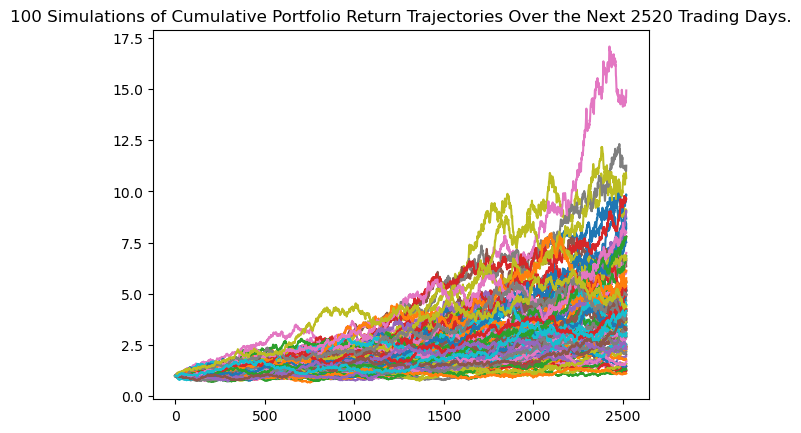

In [14]:
# plot simulation
line_plot = MC_1.plot_simulation()

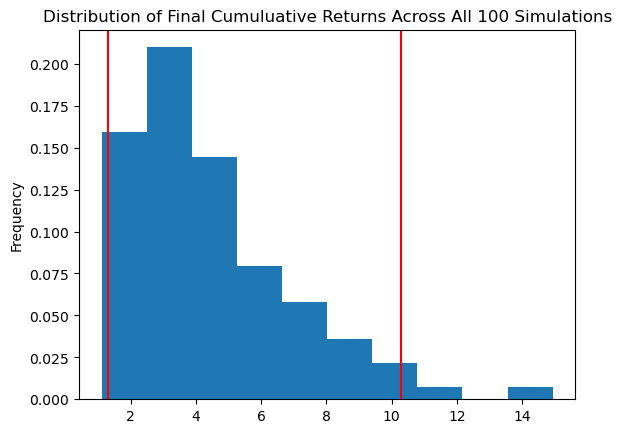

In [15]:
# Plot probability distribution and confidence intervals
dist_plot = MC_1.plot_distribution()

In [16]:
# Summary statistics from the Monte Carlo simulation results
tbl_ = MC_1.summarize_cumulative_return()

print(tbl_)

count           100.000000
mean              4.495537
std               2.510928
min               1.113710
25%               2.888999
50%               3.807766
75%               5.579083
max              14.932289
95% CI Lower      1.291518
95% CI Upper     10.272259
Name: 2520, dtype: float64


In [17]:
# Initial investment
initial_investment = 100000

# Lower and upper `95%` confidence intervals
ci_lower = round(tbl_[8]*initial_investment,2)
ci_upper = round(tbl_[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment}"
      f" over the next 10 years will end within the range of"
      f" ${ci_lower} and ${ci_upper}")



There is a 95% chance that an initial investment of $100000 over the next 10 years will end within the range of $129151.76 and $1027225.9


- TSLA Monte Carlo

In [18]:
MC_TSLA = MCSimulation(
    portfolio_data = df_ticker,
    weights = [1,0,0,0,0],
    num_simulation = 100,
    num_trading_days = 252*10)

In [19]:
MC_TSLA.portfolio_data.head()

TSLA                                                            \
              open    high     low   close    volume trade_count        vwap   
2017-11-17  325.67  326.67  313.15  315.05  13787039      136242  318.163279   
2017-11-20  313.79  315.50  304.75  308.74   8247753       81075  307.918540   
2017-11-21  310.86  318.23  308.71  317.81   7296732       69382  314.991916   
2017-11-22  316.77  317.42  311.84  312.60   4917636       48176  313.721212   
2017-11-24  313.79  316.41  311.00  315.55   3244065       30179  314.339344   

                            SPY            ...        AAPL               \
           daily_return    open      high  ...        vwap daily_return   
2017-11-17          NaN  258.22  258.5882  ...  170.393943          NaN   
2017-11-20    -0.020029  258.14  258.5250  ...  170.000606    -0.000999   
2017-11-21     0.029377  259.18  260.2000  ...  172.945834     0.018590   
2017-11-22    -0.016393  260.00  260.1500  ...  174.322524     0.010512   
2017-11-24     0.009437  260.32  260.4800  ...  175.096149     0.000057   

               ESGU                                                         \
               open    high      low   close volume trade_count       vwap   
2017-11-17  56.5500  56.585  56.4421  56.509   3057          24  56.529770   
2017-11-20  56.6600  56.660  56.5100  56.550   8575          49  56.586540   
2017-11-21  56.7897  56.910  56.7500  56.900   5409          30  56.858212   
2017-11-22  56.9000  56.900  56.8350  56.890   1893          19  56.871652   
2017-11-24  56.8950  57.000  56.8810  57.000   3373          25  56.930960   

                         
           daily_return  
2017-11-17          NaN  
2017-11-20     0.000726  
2017-11-21     0.006189  
2017-11-22    -0.000176  
2017-11-24     0.001934  

[5 rows x 40 columns]

In [20]:
# run simulation
MC_TSLA.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.081822,0.997324,0.975224,0.974117,0.995279,1.061561,1.063659,1.009612,1.048998,0.904155,...,1.009140,1.059847,1.044064,1.000659,1.057320,1.000386,0.997027,1.000048,1.102089,0.950783
2,1.034912,0.930340,0.967501,1.063516,0.953972,1.044866,1.068721,0.993982,1.038738,0.862530,...,0.996608,1.011021,1.031366,1.016701,1.001608,0.943633,1.000911,1.068879,1.035137,0.906547
3,0.985679,0.964755,0.990961,1.005528,1.000968,1.120284,1.016870,1.022011,1.020526,0.892199,...,0.959770,1.024285,1.098226,1.054583,0.973141,0.998429,0.968905,1.037773,1.009393,0.934352
4,0.967556,1.031987,1.031162,1.037616,1.007523,1.147510,1.050133,0.948776,1.013062,0.907078,...,0.978508,1.047764,1.018496,1.086112,0.944016,1.032750,0.894414,1.105270,1.040837,0.885808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.071441,0.154417,1.093853,0.520318,12.187479,41.987275,3.361215,0.049065,3.672033,0.060487,...,12.359149,0.314785,4.193822,34.071556,46.048743,79.250248,2.064134,3.404792,0.378542,0.558665
2517,1.073488,0.154522,1.095020,0.531397,12.073528,46.394193,3.497012,0.048906,3.751040,0.057542,...,11.845643,0.307257,4.342085,38.018115,44.803021,82.952625,2.205078,3.180084,0.384856,0.584083
2518,1.079744,0.144401,0.971167,0.507050,11.781247,46.948644,3.624635,0.045113,3.804638,0.059399,...,12.747599,0.322026,4.258239,36.203384,42.611539,86.482075,2.314225,2.878910,0.405533,0.584452
2519,1.061786,0.144175,0.979818,0.522857,11.309296,48.310110,3.498786,0.043554,3.692113,0.061924,...,11.947762,0.311975,4.287010,34.000053,46.291131,89.342670,2.251896,3.070790,0.393789,0.619273


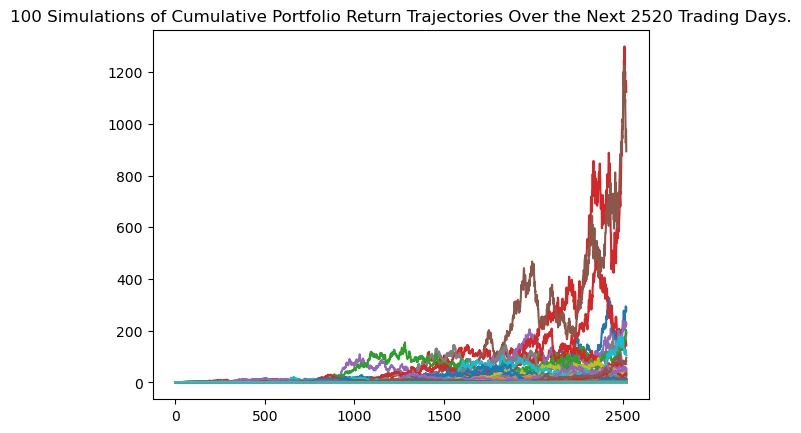

In [21]:
# plot simulation
line_plot = MC_TSLA.plot_simulation()

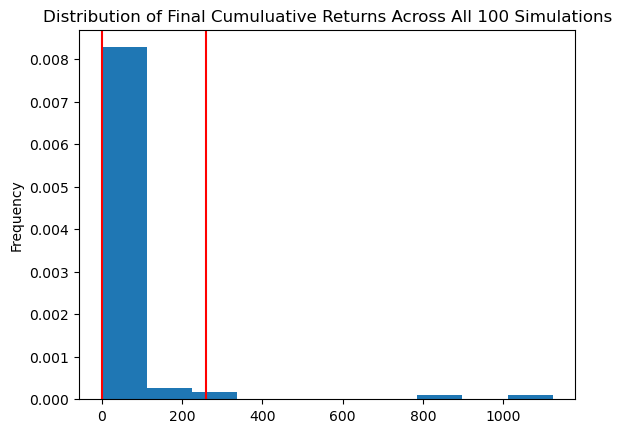

In [22]:
# Plot probability distribution and confidence intervals
dist_plot = MC_TSLA.plot_distribution()

In [23]:
# Summary statistics from the Monte Carlo simulation results
tbl_TSLA = MC_TSLA.summarize_cumulative_return()

print(tbl_TSLA)

count            100.000000
mean              39.892755
std              148.294744
min                0.005937
25%                0.330318
50%                1.008481
75%               13.291624
max             1123.253720
95% CI Lower       0.021719
95% CI Upper     258.937809
Name: 2520, dtype: float64


In [60]:
# Initial investment
initial_investment_TSLA = 100000

# Lower and upper `95%` confidence intervals
ci_lower_TSLA = round(tbl_TSLA[8]*initial_investment_TSLA,2)
ci_upper_TSLA = round(tbl_TSLA[9]*initial_investment_TSLA,2)
ci_mean_TSLA = round(tbl_TSLA[1],2)

In [25]:
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_TSLA}"
      f" over the next 10 years will end within the range of"
      f" ${ci_lower_TSLA} and ${ci_upper_TSLA}")

There is a 95% chance that an initial investment of $100000 over the next 10 years will end within the range of $2171.86 and $25893780.88


In [67]:
#Print anaual return resutls
print(f"There is a mean return of {(ci_mean_TSLA**(1/10)-1)*100:.2f}%")


There is a mean return of 44.57%


- SPY Monte Carlo

In [26]:
MC_SPY = MCSimulation(
    portfolio_data = df_ticker,
    weights = [0,1,0,0,0],
    num_simulation = 100,
    num_trading_days = 252*10)

In [27]:
MC_SPY.portfolio_data.head()

TSLA                                                            \
              open    high     low   close    volume trade_count        vwap   
2017-11-17  325.67  326.67  313.15  315.05  13787039      136242  318.163279   
2017-11-20  313.79  315.50  304.75  308.74   8247753       81075  307.918540   
2017-11-21  310.86  318.23  308.71  317.81   7296732       69382  314.991916   
2017-11-22  316.77  317.42  311.84  312.60   4917636       48176  313.721212   
2017-11-24  313.79  316.41  311.00  315.55   3244065       30179  314.339344   

                            SPY            ...        AAPL               \
           daily_return    open      high  ...        vwap daily_return   
2017-11-17          NaN  258.22  258.5882  ...  170.393943          NaN   
2017-11-20    -0.020029  258.14  258.5250  ...  170.000606    -0.000999   
2017-11-21     0.029377  259.18  260.2000  ...  172.945834     0.018590   
2017-11-22    -0.016393  260.00  260.1500  ...  174.322524     0.010512   
2017-11-24     0.009437  260.32  260.4800  ...  175.096149     0.000057   

               ESGU                                                         \
               open    high      low   close volume trade_count       vwap   
2017-11-17  56.5500  56.585  56.4421  56.509   3057          24  56.529770   
2017-11-20  56.6600  56.660  56.5100  56.550   8575          49  56.586540   
2017-11-21  56.7897  56.910  56.7500  56.900   5409          30  56.858212   
2017-11-22  56.9000  56.900  56.8350  56.890   1893          19  56.871652   
2017-11-24  56.8950  57.000  56.8810  57.000   3373          25  56.930960   

                         
           daily_return  
2017-11-17          NaN  
2017-11-20     0.000726  
2017-11-21     0.006189  
2017-11-22    -0.000176  
2017-11-24     0.001934  

[5 rows x 40 columns]

In [28]:
# run simulation
MC_SPY.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000790,0.986001,0.989661,1.018621,1.007429,1.003990,0.983495,0.991716,1.017732,0.997241,...,0.990137,1.011620,1.011334,0.999000,1.009726,1.001854,1.032063,1.005529,1.002943,1.005018
2,0.996879,0.978686,0.990615,1.011976,1.008179,1.006531,0.989288,0.988829,1.005967,1.005543,...,0.989004,1.038583,0.994150,0.989521,1.039840,0.998937,1.034957,1.022793,1.016415,0.997362
3,0.997138,0.979475,0.993031,1.021486,1.021111,1.017140,0.997847,0.977939,0.993897,1.025349,...,0.972366,1.035487,0.996446,0.987883,1.024226,1.006988,1.058531,1.028381,1.022153,0.979426
4,1.017760,0.961988,1.002642,1.021979,1.035044,1.023530,1.003545,0.960061,1.011637,1.052728,...,0.986239,1.040673,0.992914,1.006785,1.045062,0.995829,1.068201,1.008683,1.010314,0.984484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.226974,1.952165,1.176400,1.979708,1.769653,2.082383,1.252432,8.868682,3.583023,3.066985,...,1.198173,2.695024,1.284252,1.701539,5.530152,3.337798,2.267670,1.765386,1.440695,1.153196
2517,3.213324,1.956463,1.194387,2.004194,1.773212,2.089379,1.249257,8.873263,3.592295,3.129181,...,1.169201,2.728513,1.279897,1.719057,5.607041,3.383758,2.247597,1.764172,1.444197,1.157923
2518,3.238528,1.947281,1.168562,2.027142,1.785063,2.068221,1.270413,8.940493,3.617101,3.076547,...,1.149408,2.712084,1.289120,1.722620,5.679583,3.289541,2.242644,1.773118,1.394004,1.144574
2519,3.253155,1.931810,1.152927,1.990800,1.752341,2.075607,1.261735,8.972044,3.617295,3.011382,...,1.156391,2.687321,1.272012,1.711050,5.493690,3.296206,2.251314,1.799790,1.409108,1.138641


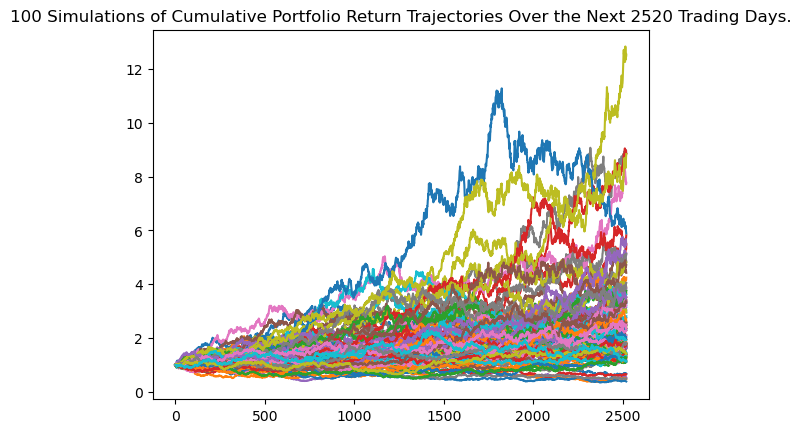

In [29]:
# plot simulation
line_plot = MC_SPY.plot_simulation()

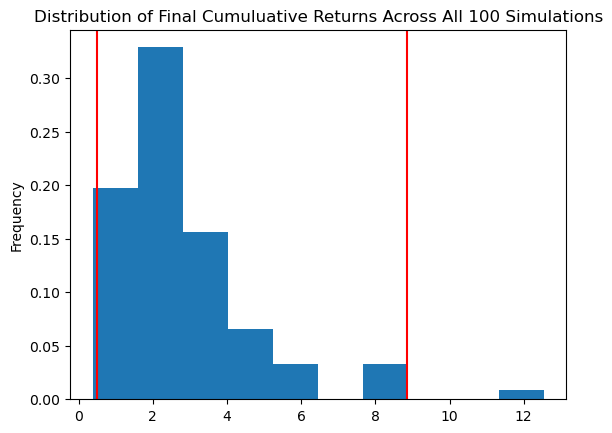

In [30]:
# Plot probability distribution and confidence intervals
dist_plot = MC_SPY.plot_distribution()

In [31]:
# Summary statistics from the Monte Carlo simulation results
tbl_SPY = MC_SPY.summarize_cumulative_return()

print(tbl_SPY)

count           100.000000
mean              2.805771
std               2.009711
min               0.382607
25%               1.614716
50%               2.279849
75%               3.446106
max              12.540721
95% CI Lower      0.508237
95% CI Upper      8.847548
Name: 2520, dtype: float64


In [63]:
# Initial investment
initial_investment_SPY = 100000

# Lower and upper `95%` confidence intervals
ci_lower_SPY = round(tbl_SPY[8]*initial_investment_SPY,2)
ci_upper_SPY = round(tbl_SPY[9]*initial_investment_SPY,2)
ci_mean_spy = round(tbl_SPY[1],2)

In [33]:
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_SPY}"
      f" over the next 10 years will end within the range of"
      f" ${ci_lower_SPY} and ${ci_upper_SPY}")

There is a 95% chance that an initial investment of $100000 over the next 10 years will end within the range of $50823.68 and $884754.8


In [66]:
#Print anaual return resutls
print(f"There is a mean return of {(ci_mean_spy**(1/10)-1)*100:0.2f}%")


There is a mean return of 10.88%


- XEL Monte Carlo

In [34]:
MC_XEL = MCSimulation(
    portfolio_data = df_ticker,
    weights = [0,0,1,0,0],
    num_simulation = 100,
    num_trading_days = 252*10)

In [35]:
MC_XEL.portfolio_data.head()

TSLA                                                            \
              open    high     low   close    volume trade_count        vwap   
2017-11-17  325.67  326.67  313.15  315.05  13787039      136242  318.163279   
2017-11-20  313.79  315.50  304.75  308.74   8247753       81075  307.918540   
2017-11-21  310.86  318.23  308.71  317.81   7296732       69382  314.991916   
2017-11-22  316.77  317.42  311.84  312.60   4917636       48176  313.721212   
2017-11-24  313.79  316.41  311.00  315.55   3244065       30179  314.339344   

                            SPY            ...        AAPL               \
           daily_return    open      high  ...        vwap daily_return   
2017-11-17          NaN  258.22  258.5882  ...  170.393943          NaN   
2017-11-20    -0.020029  258.14  258.5250  ...  170.000606    -0.000999   
2017-11-21     0.029377  259.18  260.2000  ...  172.945834     0.018590   
2017-11-22    -0.016393  260.00  260.1500  ...  174.322524     0.010512   
2017-11-24     0.009437  260.32  260.4800  ...  175.096149     0.000057   

               ESGU                                                         \
               open    high      low   close volume trade_count       vwap   
2017-11-17  56.5500  56.585  56.4421  56.509   3057          24  56.529770   
2017-11-20  56.6600  56.660  56.5100  56.550   8575          49  56.586540   
2017-11-21  56.7897  56.910  56.7500  56.900   5409          30  56.858212   
2017-11-22  56.9000  56.900  56.8350  56.890   1893          19  56.871652   
2017-11-24  56.8950  57.000  56.8810  57.000   3373          25  56.930960   

                         
           daily_return  
2017-11-17          NaN  
2017-11-20     0.000726  
2017-11-21     0.006189  
2017-11-22    -0.000176  
2017-11-24     0.001934  

[5 rows x 40 columns]

In [36]:
# run simulation
MC_XEL.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011791,1.012944,1.042016,0.988193,0.976893,1.009846,1.014027,0.984890,0.996967,0.991343,...,0.985724,0.990457,0.979645,1.018669,1.007198,1.008835,1.004001,0.991026,0.973552,1.030979
2,0.994629,0.999426,1.040409,0.986908,0.965897,0.993903,0.977935,1.001768,1.009830,0.961584,...,0.969630,0.987981,0.964456,1.017718,0.996444,1.010836,1.015614,0.976861,0.992046,1.031635
3,1.002276,1.007545,1.013134,0.973131,0.974321,1.009407,0.976953,0.975203,1.003489,0.958519,...,0.943392,0.982036,0.973552,0.979318,0.994668,1.008633,1.030170,0.965913,0.995447,1.011041
4,1.006948,0.998614,1.023560,0.976192,0.984177,0.979397,0.971426,0.973612,1.032557,0.961509,...,0.959646,1.000078,0.948825,0.953232,0.997793,1.001235,1.020574,0.942289,0.969622,1.005321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.493435,0.356468,1.821487,2.002235,1.151663,0.478793,2.552470,1.296867,1.759931,1.698837,...,0.439428,2.601863,0.986573,2.263059,1.016813,0.586081,0.846136,0.895188,0.773801,2.469638
2517,3.552922,0.353732,1.800014,2.023782,1.164784,0.474960,2.544367,1.279365,1.842184,1.678907,...,0.439589,2.586040,1.003032,2.295369,1.015003,0.587321,0.850596,0.845782,0.769942,2.477946
2518,3.533776,0.353610,1.805649,2.061850,1.158457,0.486101,2.585846,1.275082,1.882302,1.650610,...,0.439331,2.583093,1.003846,2.307355,1.024392,0.601367,0.844019,0.835303,0.767439,2.435693
2519,3.505814,0.352479,1.803625,2.088129,1.177469,0.494150,2.565602,1.274083,1.918198,1.653985,...,0.446172,2.592395,1.000803,2.351343,1.010039,0.612198,0.860995,0.830683,0.773355,2.447718


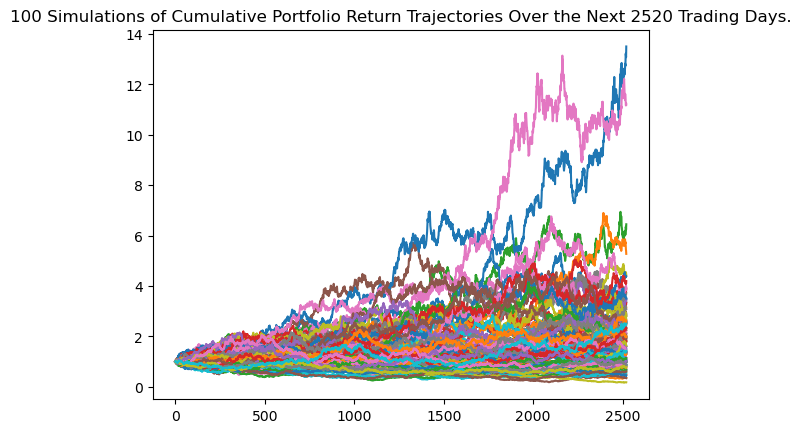

In [37]:
# plot simulation
line_plot = MC_XEL.plot_simulation()

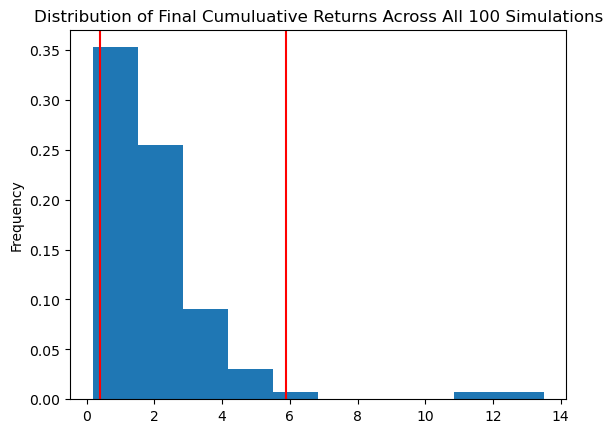

In [38]:
# Plot probability distribution and confidence intervals
dist_plot = MC_XEL.plot_distribution()

In [39]:
# Summary statistics from the Monte Carlo simulation results
tbl_XEL = MC_XEL.summarize_cumulative_return()

print(tbl_XEL)

count           100.000000
mean              2.095281
std               1.879264
min               0.179381
25%               1.004287
50%               1.627489
75%               2.579673
max              13.502467
95% CI Lower      0.394700
95% CI Upper      5.890214
Name: 2520, dtype: float64


In [68]:
# Initial investment
initial_investment_XEL = 100000

# Lower and upper `95%` confidence intervals
ci_lower_XEL = round(tbl_XEL[8]*initial_investment_XEL,2)
ci_upper_XEL = round(tbl_XEL[9]*initial_investment_XEL,2)
ci_mean_XEL = round(tbl_XEL[1],2)

In [41]:
print(f"There is a 95% chance that an initial investment of ${initial_investment_XEL}"
      f" over the next 10 years will end within the range of"
      f" ${ci_lower_XEL} and ${ci_upper_XEL}")

There is a 95% chance that an initial investment of $100000 over the next 10 years will end within the range of $39470.05 and $589021.39


In [69]:
#Print anaual return resutls
print(f"There is a mean return of {(ci_mean_XEL**(1/10)-1)*100:.2f}%")


There is a mean return of 7.70%


- AAPL Monte Carlo

In [42]:
MC_AAPL = MCSimulation(
    portfolio_data = df_ticker,
    weights = [0,0,0,1,0],
    num_simulation = 100,
    num_trading_days = 252*10)

In [43]:
MC_AAPL.portfolio_data.head()

TSLA                                                            \
              open    high     low   close    volume trade_count        vwap   
2017-11-17  325.67  326.67  313.15  315.05  13787039      136242  318.163279   
2017-11-20  313.79  315.50  304.75  308.74   8247753       81075  307.918540   
2017-11-21  310.86  318.23  308.71  317.81   7296732       69382  314.991916   
2017-11-22  316.77  317.42  311.84  312.60   4917636       48176  313.721212   
2017-11-24  313.79  316.41  311.00  315.55   3244065       30179  314.339344   

                            SPY            ...        AAPL               \
           daily_return    open      high  ...        vwap daily_return   
2017-11-17          NaN  258.22  258.5882  ...  170.393943          NaN   
2017-11-20    -0.020029  258.14  258.5250  ...  170.000606    -0.000999   
2017-11-21     0.029377  259.18  260.2000  ...  172.945834     0.018590   
2017-11-22    -0.016393  260.00  260.1500  ...  174.322524     0.010512   
2017-11-24     0.009437  260.32  260.4800  ...  175.096149     0.000057   

               ESGU                                                         \
               open    high      low   close volume trade_count       vwap   
2017-11-17  56.5500  56.585  56.4421  56.509   3057          24  56.529770   
2017-11-20  56.6600  56.660  56.5100  56.550   8575          49  56.586540   
2017-11-21  56.7897  56.910  56.7500  56.900   5409          30  56.858212   
2017-11-22  56.9000  56.900  56.8350  56.890   1893          19  56.871652   
2017-11-24  56.8950  57.000  56.8810  57.000   3373          25  56.930960   

                         
           daily_return  
2017-11-17          NaN  
2017-11-20     0.000726  
2017-11-21     0.006189  
2017-11-22    -0.000176  
2017-11-24     0.001934  

[5 rows x 40 columns]

In [44]:
# run simulation
MC_AAPL.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.973883,1.035317,1.013186,1.016466,0.982796,0.994137,1.061064,0.965579,0.968271,1.029084,...,0.986020,1.011135,0.984819,1.014537,1.047479,0.977123,0.956824,0.999417,1.036917,0.989621
2,1.011351,1.052237,1.010089,1.008329,0.971071,0.983265,1.102159,0.974302,0.945766,1.034418,...,1.022480,1.018927,0.927315,0.984778,1.031501,0.928136,0.954978,1.005340,1.016353,0.964943
3,0.929624,1.075971,0.998616,0.958619,0.966365,0.972816,1.130994,0.982927,0.955342,1.026165,...,0.998237,1.035265,0.949729,1.040978,1.023368,0.909800,0.947335,0.977711,0.983128,0.981678
4,0.908780,1.079441,1.014171,0.977241,0.962381,0.964541,1.200637,1.000532,0.964814,0.967551,...,0.981266,1.069396,0.913768,1.093575,1.040811,0.897457,0.907844,0.995894,0.980625,0.970372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.467588,9.630004,4.261818,66.631404,1.236803,9.706616,0.328770,3.655647,1.624245,0.645083,...,3.275245,14.293136,0.563386,1.687717,21.636804,1.767001,2.825842,0.261877,0.457955,0.550076
2517,1.519421,9.516378,4.173670,68.515910,1.204636,9.858376,0.320607,3.531654,1.597481,0.654942,...,3.095551,14.238949,0.559520,1.712242,21.109611,1.819218,2.724281,0.275916,0.453502,0.562366
2518,1.547135,9.253467,4.034376,68.150347,1.182505,9.795327,0.336841,3.517132,1.605940,0.605282,...,3.238543,14.372533,0.553845,1.764095,21.266424,1.726687,2.781261,0.284371,0.465407,0.582715
2519,1.583477,9.257866,3.876578,66.476202,1.145017,10.221034,0.342048,3.506686,1.603413,0.619772,...,3.236537,13.532064,0.592096,1.762140,20.602811,1.678783,3.027455,0.270120,0.484381,0.587599


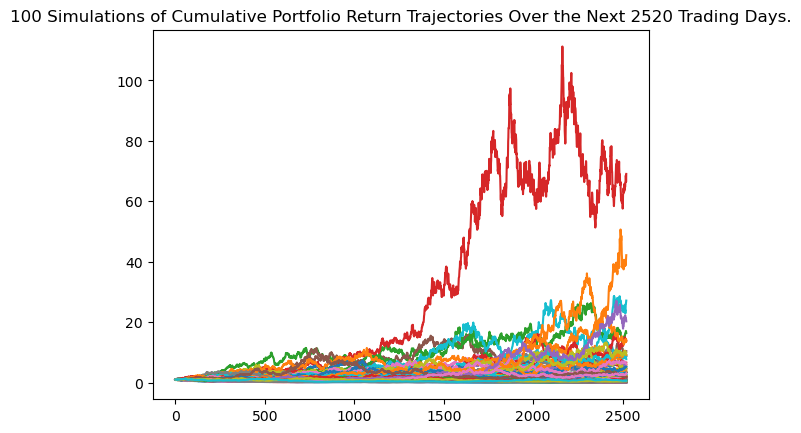

In [45]:
# plot simulation
line_plot = MC_AAPL.plot_simulation()

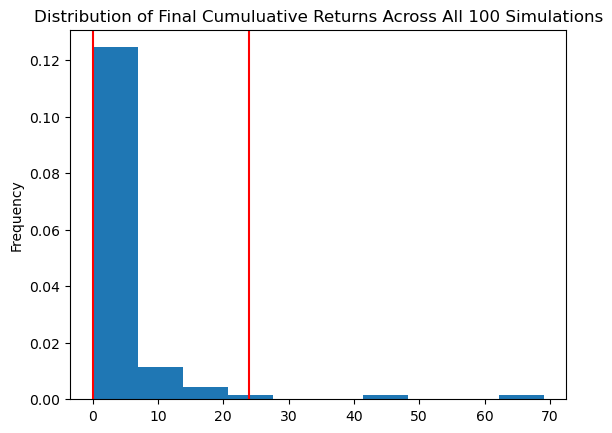

In [46]:
# Plot probability distribution and confidence intervals
dist_plot = MC_AAPL.plot_distribution()

In [47]:
# Summary statistics from the Monte Carlo simulation results
tbl_AAPL = MC_AAPL.summarize_cumulative_return()

print(tbl_AAPL)

count           100.000000
mean              4.134704
std               8.823331
min               0.032974
25%               0.530652
50%               1.587710
75%               3.641630
max              69.064897
95% CI Lower      0.060174
95% CI Upper     23.875528
Name: 2520, dtype: float64


In [70]:
# Initial investment
initial_investment_AAPL = 100000

# Lower and upper `95%` confidence intervals
ci_lower_AAPL = round(tbl_AAPL[8]*initial_investment_AAPL,2)
ci_upper_AAPL = round(tbl_AAPL[9]*initial_investment_AAPL,2)
ci_mean_AAPL = round(tbl_AAPL[1],2)

In [49]:
print(f"There is a 95% chance that an initial investment of ${initial_investment_AAPL}"
      f" over the next 10 years will end within the range of"
      f" ${ci_lower_AAPL} and ${ci_upper_AAPL}")

There is a 95% chance that an initial investment of $100000 over the next 10 years will end within the range of $6017.38 and $2387552.8


In [71]:
#Print anaual return resutls
print(f"There is a mean return of {(ci_mean_AAPL**(1/10)-1)*100:.2f}%")


There is a mean return of 15.24%


- ESGU Monte Carlo

In [50]:
MC_ESGU = MCSimulation(
    portfolio_data = df_ticker,
    weights = [0,0,0,0,1],
    num_simulation = 100,
    num_trading_days = 252*10)

In [51]:
MC_ESGU.portfolio_data.head()

TSLA                                                            \
              open    high     low   close    volume trade_count        vwap   
2017-11-17  325.67  326.67  313.15  315.05  13787039      136242  318.163279   
2017-11-20  313.79  315.50  304.75  308.74   8247753       81075  307.918540   
2017-11-21  310.86  318.23  308.71  317.81   7296732       69382  314.991916   
2017-11-22  316.77  317.42  311.84  312.60   4917636       48176  313.721212   
2017-11-24  313.79  316.41  311.00  315.55   3244065       30179  314.339344   

                            SPY            ...        AAPL               \
           daily_return    open      high  ...        vwap daily_return   
2017-11-17          NaN  258.22  258.5882  ...  170.393943          NaN   
2017-11-20    -0.020029  258.14  258.5250  ...  170.000606    -0.000999   
2017-11-21     0.029377  259.18  260.2000  ...  172.945834     0.018590   
2017-11-22    -0.016393  260.00  260.1500  ...  174.322524     0.010512   
2017-11-24     0.009437  260.32  260.4800  ...  175.096149     0.000057   

               ESGU                                                         \
               open    high      low   close volume trade_count       vwap   
2017-11-17  56.5500  56.585  56.4421  56.509   3057          24  56.529770   
2017-11-20  56.6600  56.660  56.5100  56.550   8575          49  56.586540   
2017-11-21  56.7897  56.910  56.7500  56.900   5409          30  56.858212   
2017-11-22  56.9000  56.900  56.8350  56.890   1893          19  56.871652   
2017-11-24  56.8950  57.000  56.8810  57.000   3373          25  56.930960   

                         
           daily_return  
2017-11-17          NaN  
2017-11-20     0.000726  
2017-11-21     0.006189  
2017-11-22    -0.000176  
2017-11-24     0.001934  

[5 rows x 40 columns]

In [52]:
# run simulation
MC_ESGU.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.033898,1.000256,0.994151,1.012414,0.991214,1.011154,0.996793,0.992877,0.997571,1.013811,...,0.998938,1.010506,0.983547,1.021809,0.994835,1.014634,1.043660,1.004202,0.999722,0.991871
2,1.016535,1.014204,1.007903,1.023469,0.998014,1.011278,0.996886,0.996545,1.032014,1.011689,...,0.980790,1.024751,0.978655,1.018108,0.993470,1.004090,1.039329,0.997781,1.005083,0.983451
3,1.033513,0.995832,1.012806,1.022683,0.963067,0.992142,1.010152,1.007530,1.039243,1.014072,...,0.953898,1.024837,0.961675,1.001298,1.003766,1.024930,1.043404,1.001808,1.015271,0.987055
4,1.049525,0.987827,1.004588,1.020977,0.954786,1.004602,0.997079,1.018246,1.038668,1.017362,...,0.952312,1.019569,0.978199,1.000323,1.011404,1.062502,1.057507,1.005199,1.020101,0.986892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.872395,0.894385,3.509290,2.688705,0.770484,1.584558,3.538936,1.884065,0.585750,1.295023,...,0.789395,2.201792,4.195014,0.853750,0.721598,4.434989,1.683779,4.397947,2.744887,1.071122
2517,0.868080,0.903249,3.526300,2.715911,0.769132,1.583140,3.587108,1.895192,0.589106,1.297420,...,0.785406,2.255279,4.253237,0.866521,0.714641,4.330901,1.679187,4.449372,2.773955,1.065665
2518,0.837912,0.881967,3.522708,2.733638,0.771421,1.620723,3.673698,1.898428,0.583206,1.290609,...,0.798417,2.217174,4.259579,0.896024,0.704792,4.409404,1.673058,4.561672,2.766702,1.076273
2519,0.847889,0.878693,3.504724,2.687500,0.772697,1.655547,3.709806,1.911055,0.591810,1.284179,...,0.796018,2.211702,4.311540,0.871991,0.701144,4.390155,1.686258,4.500918,2.808718,1.058714


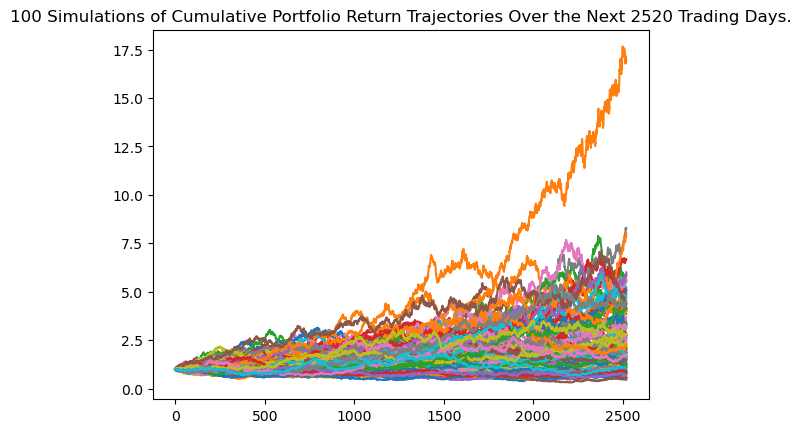

In [53]:
# plot simulation
line_plot = MC_ESGU.plot_simulation()

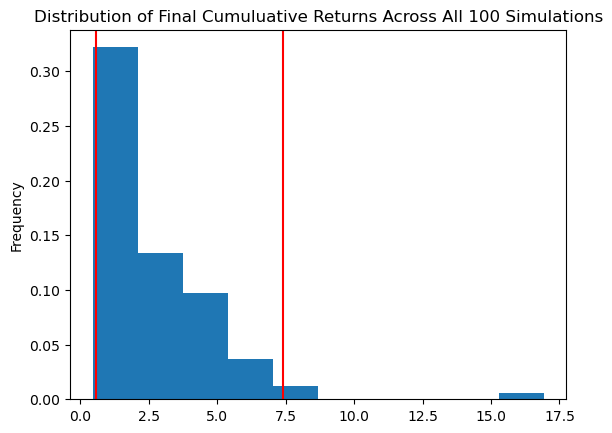

In [54]:
# Plot probability distribution and confidence intervals
dist_plot = MC_ESGU.plot_distribution()

In [55]:
# Summary statistics from the Monte Carlo simulation results
tbl_ESGU = MC_ESGU.summarize_cumulative_return()

print(tbl_ESGU)

count           100.000000
mean              2.720257
std               2.233496
min               0.457482
25%               1.292749
50%               2.041151
75%               3.732355
max              16.925373
95% CI Lower      0.562802
95% CI Upper      7.391103
Name: 2520, dtype: float64


In [72]:
# Initial investment
initial_investment_ESGU = 100000

# Lower and upper `95%` confidence intervals
ci_lower_ESGU = round(tbl_ESGU[8]*initial_investment_ESGU,2)
ci_upper_ESGU = round(tbl_ESGU[9]*initial_investment_ESGU,2)
ci_mean_ESGU = round(tbl_ESGU[1],2)

In [57]:
print(f"There is a 95% chance that an initial investment of ${initial_investment_ESGU}"
      f" over the next 10 years will end within the range of"
      f" ${ci_lower_ESGU} and ${ci_upper_ESGU}")

There is a 95% chance that an initial investment of $100000 over the next 10 years will end within the range of $56280.22 and $739110.31


In [73]:
#Print anaual return resutls
print(f"There is a mean return of {(ci_mean_ESGU**(1/10)-1)*100:.2f}%")


There is a mean return of 10.52%
